<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/Practice/Practice_4_Bode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Important information**

> **LABS** \
**Tasks for lab 1:** [Lab 1](https://github.com/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/Assignment/Assignment1.ipynb)\
**Deadline:** 15th of February\
**Requirements for the submission:** upload a `.pdf`-file (printout of the Colab page / jupiter notebook with the results of the code run) plus the code itself `.ipynb`-file\
**File name for lab submission:** `yourname_group.ipynb` (example: `IvanovIvan_B20-05.ipynb`)

>**FEEDBACK** \
Feedback form is available by the [link](https://forms.gle/CcqEwfg97aHQcZJi6)

# **Practice 4: Bode plot**
## **Goals for today**

---

During today practice we will:
* Repeat State space representation
* Recall transformation between State space model and Transfer function
* Define frequency response
* Learn how to make a bode plot



## **State space representation**

In control engineering, a *state-space representation* is a mathematical model of a physical system as a set of input, output and state variables related by first-order differential equations or difference equations. State variables are variables whose values evolve over time in a way that depends on the values they have at any given time and on the externally imposed values of input variables. Output variables’ values depend on the values of the state variables.

A control system is a system, which provides the desired response by controlling the output. The following figure shows the simple block diagram of a control system.

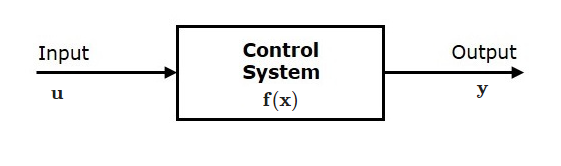

In case if relationships between state, output and control is **linear**, we can formulate the model of system in following form:
\begin{equation}
\begin{cases} 
\mathbf{\dot{x}} =\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\ 
\mathbf{y}=\mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}

where
*   $\mathbf{x} \in \mathbb{R}^n$ states of the system
*   $\mathbf{y} \in \mathbb{R}^l$ output vector
*   $\mathbf{u} \in \mathbb{R}^m$ control inputs
*   $\mathbf{A} \in \mathbb{R}^{n \times n}$ state matrix
*   $\mathbf{B} \in \mathbb{R}^{n \times m}$ input matrix
*   $\mathbf{C} \in \mathbb{R}^{l \times n}$ output matrix
*   $\mathbf{D} \in \mathbb{R}^{l \times m}$ feedforward matrix

>Note:  
If matrices $\mathbf{A},\mathbf{B},\mathbf{C},\mathbf{D}$ are time dependend, we call such systems **time-varient**. However, in practice we often deal with systems whose dynamics is time-invarient. In this case this matrices will be constant.

## **Transformation from State space representation to transfer function**


Consider standard form state-space dynamical system:

\begin{equation}
\begin{cases}
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
     \mathbf{y}  = \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}

We can rewrite it using the derivative operator:

\begin{equation}
\begin{cases}
s\mathbf{I}\mathbf{X}(s) -\mathbf{A}\mathbf{X}(s) = \mathbf{B}\mathbf{U}(s) \\
\mathbf{Y}(s)  = \mathbf{C}\mathbf{X}(s) + \mathbf{D}\mathbf{U}(s)
\end{cases}
\end{equation}

and then collect $\mathbf{X}(s)$ on the left-hand-side: $\mathbf{X}(s) = (s\mathbf{I} -\mathbf{A})^{-1} \mathbf{B}\mathbf{U}(s)$

and finally, express $\mathbf{Y}(s)$ output:

\begin{equation}
\mathbf{Y}(s)  = \left( \mathbf{C}(s\mathbf{I} -\mathbf{A})^{-1} \mathbf{B} + \mathbf{D} \right) \mathbf{U}(s)
\end{equation}

This mean that the transfer function can be calculated as:
$\mathbf{G}(s) = \mathbf{C}(s\mathbf{I} -\mathbf{A})^{-1} \mathbf{B} + \mathbf{D}$

>***Note:***
To get an inverse matrix from a 2x2 matrix (for example $A = \dot{\mathbf{x}} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, you can use the formula:
>
>$$
A^{-1} = \frac{1}{ad-bc}\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$\
When $ad-bc$ is determinant of $A$ and $\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$ is adjoint of $A$

### **Exercises**
> Convert following state space models to transfer function

1. $$
\begin{cases}
    \dot{\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -7 & -7 \end{bmatrix} 
    \mathbf{x} + 
    \begin{bmatrix} 0 \\ 1 \end{bmatrix} u \\
    y = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}
\end{cases}
$$

2. $$
\begin{cases}
    \dot{\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -200 & -2 \end{bmatrix} 
    \mathbf{x} + 
    \begin{bmatrix} 10 \\ 0 \end{bmatrix} u \\
    y = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}
\end{cases}
$$

3. $$
\begin{cases}
    \dot{\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -1 & -1000 \end{bmatrix}
    \mathbf{x} + 
    \begin{bmatrix} 0 \\ -2 \end{bmatrix} u \\
    y = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}
\end{cases}
$$

## **Frequency response**


Consider a linear, time-invariant system with transfer function $\mathbf{G}(s)$. Assume that the system is subject to a sinusoidal input with frequency $\omega$:

$$
u(t) = \sin{(wt)}
$$

that is applied persistently, i.e. from a time $-\infty$  to a time $t$. The response will be of the form
$$y(t) = y_0 \sin (\omega t + \varphi)$$

i.e., also a sinusoidal signal with amplitude $y_{0}$ shifted in phase with respect to the input by a phase $\varphi$.

## **Bode plot**

**Bode plot** is a graph of the frequency response of a system. It is usually a combination of a *Bode magnitude plot*, expressing the magnitude (usually in decibels) of the frequency response, and a *Bode phase plot*, expressing the phase shift.

The ***Bode magnitude plot*** is the graph of the function $|\mathbf{G}(s=j\omega )|$ of frequency $\omega$  (with $j$ being the imaginary unit). The $\omega$-axis of the magnitude plot is logarithmic and the magnitude is given in decibels, i.e., a value for the magnitude $|\mathbf{G}|$ is plotted on the axis at $20\log _{10}|\mathbf{G}|$.

The ***Bode phase plot*** is the graph of the phase, commonly expressed in degrees, of the transfer function $\arg \left(\mathbf{G}(s=j\omega )\right)$ as a function of $\omega$ . The phase is plotted on the same logarithmic $\omega$-axis as the magnitude plot, but the value for the phase is plotted on a linear vertical axis.

>### **Examples**

> **Mass-spring-damper system**
>
>Consider the mass-spring-damper system:
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>
>
> with dynamics given by
> \begin{equation}
m \ddot y + b \dot y + k y = u
\end{equation} 
>
>where $u$ is force that applied to the mass

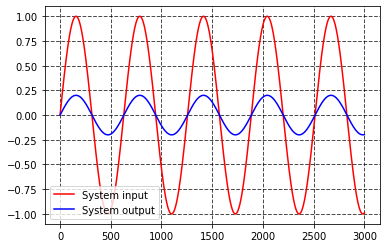

In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint

def Harmonic_control_signal(w,t):
  u = np.sin(w*t)
  return np.array([u])

def StateSpace(x, t, A, B, w):
  u = Harmonic_control_signal(w,t)
  x = np.dot(A,x)+np.dot(B,u)
  return x

def Control_system(A, B, C, D, w):
  x0 = np.array([0, 0])

  t0 = 0 # Initial time 
  tf = 1/w*30 # Final time
  t = np.linspace(t0, tf, 1000) 
  solution = odeint(StateSpace, x0, t, args=(A,B,w))
  u = Harmonic_control_signal(w,t)
  y = np.dot(C,solution.T)+np.dot(D,u)
  
  return t, np.reshape(u,t.shape), np.reshape(y,t.shape), solution

#@markdown Mass-spring-damper parameters
w = 0.01 #@param {type:"slider", min:0.01, max:10, step:0.01}
m = 1 #@param {type:"slider", min:0, max:10, step:1}
k = 5 #@param {type:"slider", min:0, max:5, step:0.1}
b = 3.17 #@param {type:"slider", min:0, max:5, step:0.01}

n = 2
A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0], [1]])

C = np.array([[1, 0]])

D = np.array([[0]])

t, u, y, x = Control_system(A, B, C, D, w)

plot(t, u, color = "red", label = "System input")
plot(t, y, color = "blue", label = "System output")
legend()
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


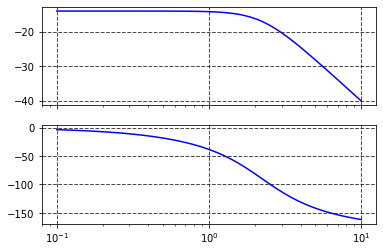

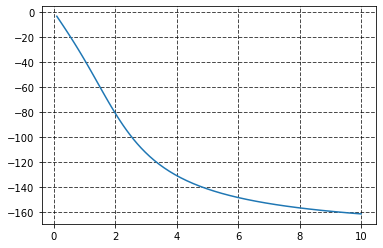

In [ ]:
from scipy.signal.ltisys import TransferFunction
from scipy.signal import ss2tf

G = ss2tf(A, B, C, D)
sys = TransferFunction(G[0], G[1])

w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
ax1.semilogx(w, mag, color="blue")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)

ax2.semilogx(w, phase, color="blue")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
show()

plot(w, phase)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
show()

>Let us recall the "love equation" between Romeo and Juliet:
$$
\begin{cases}
\dot{R}=aR+bJ \\
\dot{J}=cR+dJ
\end{cases}
$$
>
>But now lets consider the case when in our model of love there is an external control $u$ (psychologist, family or mistress of one of the partners) and this signal can affect the level of love between Romeo and Juliet with different coefficients:
\begin{equation}
\begin{bmatrix}
\dot{R} \\
\dot{J} 
\end{bmatrix} = 
\begin{bmatrix}
a R + bJ + e u\\
c R + dJ + f u
\end{bmatrix}
\end{equation}
>
>State space representation of this system is given as:
\begin{equation}
\begin{bmatrix}
\dot{R} \\
\dot{J} 
\end{bmatrix} = 
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix}
R \\
J 
\end{bmatrix} +
\begin{bmatrix}
e \\f 
\end{bmatrix}
u
\end{equation}
>
>Let us also imagine that we are Romeo's close friend, so we can trace all the output about their love only from him. Naturally, Romeo may downplay or exaggerate his feelings, so let's take his opinion with a coefficient $g$. We're a good friend, so we try not to influence his relationship with Juliette in any way, and we don't bring any additional input into the output. This mean that our dynamical system will have following form:
\begin{equation}
\begin{cases}
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
     \mathbf{y}  = \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}
when $\mathbf{x} = \begin{bmatrix}
R \\
J 
\end{bmatrix}$, $\mathbf{A} = \begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}$, $\mathbf{B} = \begin{bmatrix}
e \\f 
\end{bmatrix}$, $\mathbf{C} = \begin{bmatrix}
g & 0 
\end{bmatrix}$ and $\mathbf{D} = \begin{bmatrix} 0 \end{bmatrix}$


/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


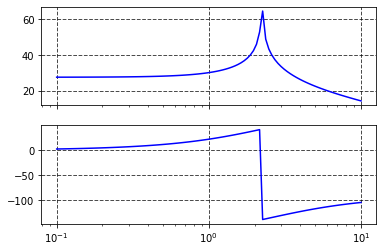

In [ ]:
from scipy.signal import ss2tf
import numpy as np
#@title **Love model**
#@markdown Romeo's parameters
a = 0 #@param {type:"slider", min:-10, max:10, step:1}
b = 5 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Juliet's parameters
c = -1 #@param {type:"slider", min:-10, max:10, step:1}
d = 0 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Control parameters
e = 8 #@param {type:"slider", min:-10, max:10, step:1}
f = 4 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Output parameter
g = 6 #@param {type:"slider", min:-10, max:10, step:1}


A = np.array([[a, b], [c, d]])
B = np.array([[e], [f]])
C = np.array([[g, 0]])
D = np.array([[0]])
G = ss2tf(A, B, C, D)

sys = TransferFunction(G[0], G[1])

w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
ax1.semilogx(w, mag, color="blue")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)

ax2.semilogx(w, phase, color="blue")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
show()

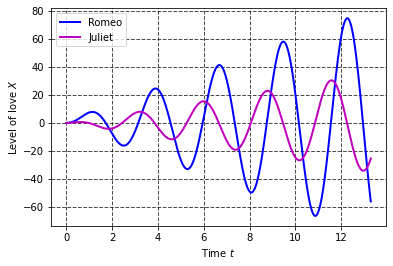

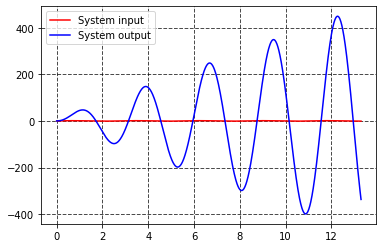

In [ ]:
w_des = w[np.argmax(mag)]

t, u, y, x = Control_system(A, B, C, D, w_des)

plot(t, x[:,0], linewidth=2.0, color = 'b', label = "Romeo")
plot(t, x[:,1], linewidth=2.0, color = 'm', label = "Juliet")
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ylabel(r'Level of love ${X}$')
xlabel(r'Time $t$')
legend()
show()

plot(t, u, color = "red", label = "System input")
plot(t, y, color = "blue", label = "System output")
legend()
grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
show()

**Resonance** describes the phenomenon of increased amplitude that occurs when the frequency of a periodically applied force (or a Fourier component of it) is equal or close to a natural frequency of the system on which it acts. When an oscillating force is applied at a resonant frequency of a dynamic system, the system will oscillate at a higher amplitude than when the same force is applied at other, non-resonant frequencies.
Resonance examples you can see by the following links:
* [How swing works](https://www.youtube.com/watch?v=UXo6WvHRs_I)
* [Tacoma Bridge Collapse](https://www.youtube.com/watch?v=3mclp9QmCGs)

## **Exercises**
> Plot Bode diagrams for the following systems:

1. $$
\begin{cases}
    \dot{\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -7 & -7 \end{bmatrix} 
    \mathbf{x} + 
    \begin{bmatrix} 0 \\ 1 \end{bmatrix} u \\
    y = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}
\end{cases}
$$

2. $$
\begin{cases}
    \dot{\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -200 & -2 \end{bmatrix} 
    \mathbf{x} + 
    \begin{bmatrix} 10 \\ 0 \end{bmatrix} u \\
    y = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}
\end{cases}
$$

3. $$
\begin{cases}
    \dot{\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -1 & -1000 \end{bmatrix}
    \mathbf{x} + 
    \begin{bmatrix} 0 \\ -2 \end{bmatrix} u \\
    y = \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}
\end{cases}
$$

In [ ]:
# Put your code here

## **Homework exercises** for self-study

>Redo the code to build Bode diagrams without calculating the Transfer function, based only on the State space model. Use [this link as reference](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.signal.StateSpace.bode.html)
